# Model and Scaler method analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator

In [2]:
filename = 'https://raw.githubusercontent.com/shravanc/datasets/master/train_data.csv'
df = pd.read_csv(filename, names=['ScalerMethod', 'RegressionModel', 'GridSearchCVScore', 'Time in min'])
df.head(20)

,ScalerMethod,RegressionModel,GridSearchCVScore,Time in min
0,transformation_Yeo_Johnson,RandomForestRegressor,9.230000e+01,1.0
1,transformation_Yeo_Johnson,ExtraTreesRegressor,8.400000e+01,1.0
2,transformation_Yeo_Johnson,Lasso,9.250000e+01,0.0
3,transformation_Yeo_Johnson,ElasticNet,9.220000e+01,0.0
4,transformation_Yeo_Johnson,LassoLars,9.180000e+01,0.0
5,transformation_Yeo_Johnson,OrthogonalMatchingPursuit,9.080000e+01,0.0
6,transformation_Yeo_Johnson,BayesianRidge,9.250000e+01,0.0
7,transformation_Yeo_Johnson,Ridge,9.230000e+01,0.0
8,transformation_Yeo_Johnson,SGDRegressor,-3.984571e+31,0.0
9,transformation_Yeo_Johnson,PassiveAggressiveRegressor,2.090000e+01,0.0


In [3]:
df.describe()

,GridSearchCVScore,Time in min
count,1.350000e+02,135.000000
mean,-2.494996e+31,1.207407
std,2.378444e+32,4.020649
min,-2.742433e+33,0.000000
25%,8.440000e+01,0.000000
50%,9.040000e+01,0.000000
75%,9.110000e+01,0.000000
max,9.350000e+01,22.000000


In [4]:
grouped = df.groupby('ScalerMethod')
df_data = {}

for group in grouped:
  scores = list(group[1].GridSearchCVScore)
  clipped_score = np.clip(scores, a_min = -1, a_max = 110)
  df_data[group[0]] = list(clipped_score)

models = list(list(grouped)[2][1].RegressionModel)
models = [l.strip() for l in models]


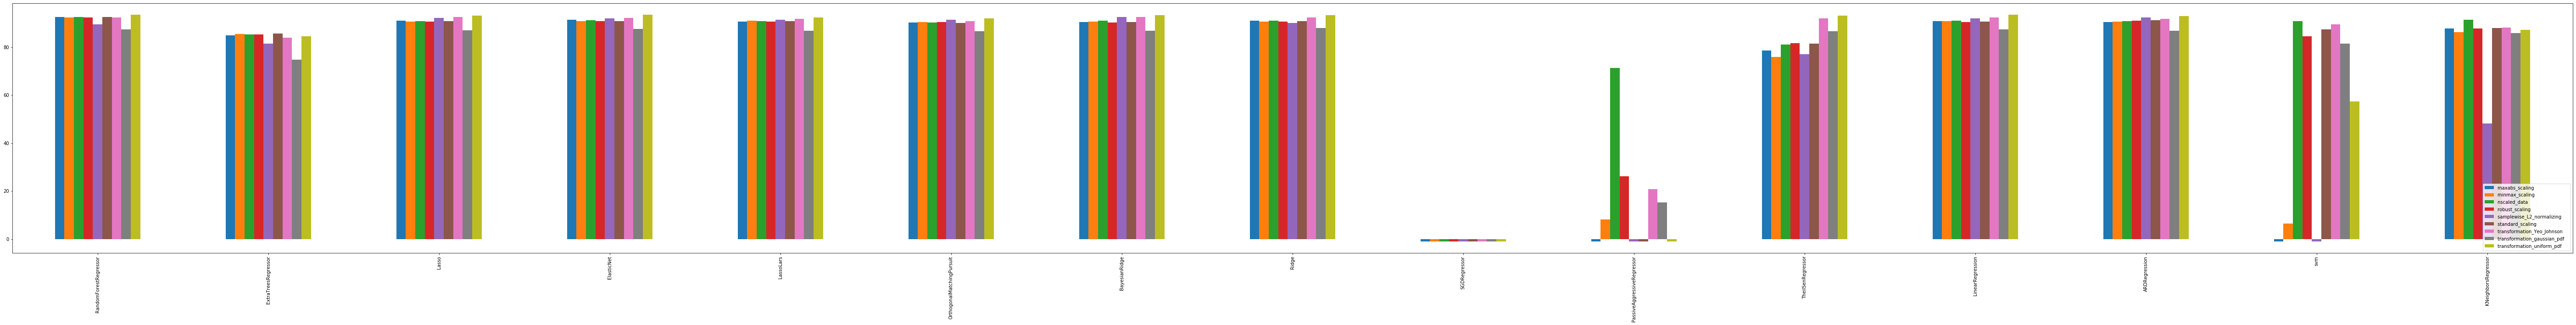

In [5]:
df_metrics = pd.DataFrame(df_data, index=models )
df_metrics.plot.bar( figsize=(100, 10))
plt.legend(loc="lower right")
plt.show()

In [6]:
results = []
for scale, score in df_data.items():
  result = {}
  result['scale'] = scale
  max_index, max_value = max(enumerate(scores), key=operator.itemgetter(1))
  result['model'] = models[max_index]
  result['best_score'] = max_value

  results.append(result)

results

[{'scale': 'maxabs_scaling                ',
  'model': 'RandomForestRegressor',
  'best_score': 93.5},
 {'scale': 'minmax_scaling                ',
  'model': 'RandomForestRegressor',
  'best_score': 93.5},
 {'scale': 'nscaled_data                  ',
  'model': 'RandomForestRegressor',
  'best_score': 93.5},
 {'scale': 'robust_scaling                ',
  'model': 'RandomForestRegressor',
  'best_score': 93.5},
 {'scale': 'samplewise_L2_normalizing     ',
  'model': 'RandomForestRegressor',
  'best_score': 93.5},
 {'scale': 'standard_scaling              ',
  'model': 'RandomForestRegressor',
  'best_score': 93.5},
 {'scale': 'transformation_Yeo_Johnson    ',
  'model': 'RandomForestRegressor',
  'best_score': 93.5},
 {'scale': 'transformation_gaussian_pdf   ',
  'model': 'RandomForestRegressor',
  'best_score': 93.5},
 {'scale': 'transformation_uniform_pdf    ',
  'model': 'RandomForestRegressor',
  'best_score': 93.5}]

In [7]:
df

,ScalerMethod,RegressionModel,GridSearchCVScore,Time in min
0,transformation_Yeo_Johnson,RandomForestRegressor,92.3,1.0
1,transformation_Yeo_Johnson,ExtraTreesRegressor,84.0,1.0
2,transformation_Yeo_Johnson,Lasso,92.5,0.0
3,transformation_Yeo_Johnson,ElasticNet,92.2,0.0
4,transformation_Yeo_Johnson,LassoLars,91.8,0.0
...,...,...,...,...
130,transformation_gaussian_pdf,TheilSenRegressor,86.6,0.0
131,transformation_gaussian_pdf,LinearRegression,87.3,0.0
132,transformation_gaussian_pdf,ARDRegression,86.8,1.0
133,transformation_gaussian_pdf,svm,81.5,22.0


In [8]:
df1 = df.drop(columns=['Time in min'])
grouped = df1.groupby(['ScalerMethod', 'RegressionModel'])
grouped['GridSearchCVScore'].describe()

count          mean  \
ScalerMethod                   RegressionModel                               
maxabs_scaling                  ARDRegression            1.0  9.050000e+01   
                                BayesianRidge            1.0  9.040000e+01   
                                ElasticNet               1.0  9.130000e+01   
                                ExtraTreesRegressor      1.0  8.490000e+01   
                                KNeighborsRegressor      1.0  8.780000e+01   
...                                                      ...           ...   
transformation_uniform_pdf      RandomForestRegressor    1.0  9.350000e+01   
                                Ridge                    1.0  9.320000e+01   
                                SGDRegressor             1.0 -2.581948e+31   
                                TheilSenRegressor        1.0  9.310000e+01   
                                svm                      1.0  5.730000e+01   

                                                       std           min  \
ScalerMethod                   RegressionModel                             
maxabs_scaling                  ARDRegression          NaN  9.050000e+01   
                                BayesianRidge          NaN  9.040000e+01   
                                ElasticNet             NaN  9.130000e+01   
                                ExtraTreesRegressor    NaN  8.490000e+01   
                                KNeighborsRegressor    NaN  8.780000e+01   
...                                                    ...           ...   
transformation_uniform_pdf      RandomForestRegressor  NaN  9.350000e+01   
                                Ridge                  NaN  9.320000e+01   
                                SGDRegressor           NaN -2.581948e+31   
                                TheilSenRegressor      NaN  9.310000e+01   
                                svm                    NaN  5.730000e+01   

                                                                25%  \
ScalerMethod                   RegressionModel                        
maxabs_scaling                  ARDRegression          9.050000e+01   
                                BayesianRidge          9.040000e+01   
                                ElasticNet             9.130000e+01   
                                ExtraTreesRegressor    8.490000e+01   
                                KNeighborsRegressor    8.780000e+01   
...                                                             ...   
transformation_uniform_pdf      RandomForestRegressor  9.350000e+01   
                                Ridge                  9.320000e+01   
                                SGDRegressor          -2.581948e+31   
                                TheilSenRegressor      9.310000e+01   
                                svm                    5.730000e+01   

                                                                50%  \
ScalerMethod                   RegressionModel                        
maxabs_scaling                  ARDRegression          9.050000e+01   
                                BayesianRidge          9.040000e+01   
                                ElasticNet             9.130000e+01   
                                ExtraTreesRegressor    8.490000e+01   
                                KNeighborsRegressor    8.780000e+01   
...                                                             ...   
transformation_uniform_pdf      RandomForestRegressor  9.350000e+01   
                                Ridge                  9.320000e+01   
                                SGDRegressor          -2.581948e+31   
                                TheilSenRegressor      9.310000e+01   
                                svm                    5.730000e+01   

                                                                75%  \
ScalerMethod                   RegressionModel                        
maxabs_scaling                  ARDRegression          9.0500